# Simplagion Model

In [5]:
import networkx as nx
import numpy as np
from scipy import random
import copy
import random
from collections import OrderedDict
import pickle
import itertools
from multiprocessing import Pool
from utils_simplagion_on_RSC import *
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
%matplotlib inline

## Single simulation 

In [33]:
it_num = 1
N = 2000
k1 = 20
k2 = 6
p1, p2 =  get_p1_and_p2(k1,k2,N) 
lambda1s = np.linspace(0.2,2.2,30)     
lambdaD_target = 2.5

I_percentage, t_max, mu = 1, 1000, 0.05
args = [it_num, N, p1, p2, lambda1s, lambdaD_target, I_percentage, t_max, mu]
rhos, real_k, real_kD  = run_one_simulation(args)

It 1 initialized
It 1, created SC with k1=20.3 and k2=6.2
It 1, simulation has finished


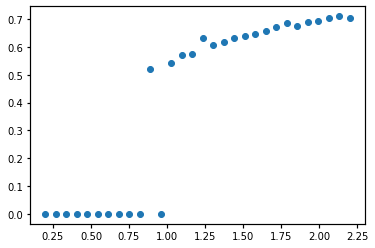

In [35]:
plt.plot(lambda1s, rhos, 'o')

## Bulk Simulation

In [2]:
#Simplicial complex parameters
N = 2000                   
k1 = 20
k2 = 6

p1, p2 = get_p1_and_p2(k1,k2,N)

#Infection parameters
mu = 0.05
lambda1s = np.linspace(0.2,2.2,30)     
lambdaD_target_list = [0,0.8,2.5,2.5]
I_percentage_list = [1,1,1,40] #initial conditions (% of infected)

#Simulation Parameters
t_max = 6000                 
n_simulations = 120
n_processes = 8

out_dir = 'simplagion-results/'

In [3]:
!mkdir ./simplagion-results/

In [6]:
iteration_numbers = range(n_simulations)

for lambdaD_target, I_percentage in tqdm(list(zip(lambdaD_target_list, I_percentage_list))):
    print('lambdaD', lambdaD_target, 'seed', I_percentage)

    ################################ Preparing arguments for the parallel processing
    args=[]
    for it_num in range(n_simulations):
        args.append([it_num, N, p1, p2, lambda1s, lambdaD_target, I_percentage, t_max, mu])

    ################################ Running in parallel
    pool = Pool(processes=n_processes)                         
    results = pool.map(run_one_simulation, args)
    
    ################################ Saving
    filename = 'result_RSC_'+'N'+str(N)+'_k'+str(k1)+'_kD'+str(k2)+'_mu'+str(mu)+'_lD'+str(lambdaD_target)+'_seed'+str(I_percentage)+'.p'
    pickle.dump(results, open(out_dir+filename, "wb" ))

  0%|          | 0/4 [00:00<?, ?it/s]

lambdaD 0 seed 1
lambdaD 0.8 seed 1
It 16 initialized
not connected, but GC has order 1999 ans size 8077
It 16, created SC with k1=19.7 and k2=5.9
It 16, simulation has finished
It 17 initialized
not connected, but GC has order 1999 ans size 8059
It 17, created SC with k1=20.2 and k2=6.1
It 17, simulation has finished
It 18 initialized
It 18, created SC with k1=20.2 and k2=6.1
It 18, simulation has finished
It 19 initialized
not connected, but GC has order 1998 ans size 8152
It 19, created SC with k1=20.1 and k2=6.0
It 19, simulation has finished
It 32 initialized
not connected, but GC has order 1999 ans size 8074
It 32, created SC with k1=20.0 and k2=6.0
It 32, simulation has finished
It 33 initialized
not connected, but GC has order 1999 ans size 8215
It 33, created SC with k1=20.1 and k2=6.0
It 33, simulation has finished
It 34 initialized
It 34, created SC with k1=20.1 and k2=6.1
It 34, simulation has finished
It 35 initialized
It 35, created SC with k1=20.2 and k2=6.1
It 35, simul

lambdaD 2.5 seed 1
It 12 initialized
not connected, but GC has order 1997 ans size 8132
It 12, created SC with k1=20.0 and k2=6.0
It 12, simulation has finished
It 13 initialized
not connected, but GC has order 1998 ans size 8021
It 13, created SC with k1=20.0 and k2=6.0
It 13, simulation has finished
It 14 initialized
It 14, created SC with k1=20.1 and k2=6.0
It 14, simulation has finished
It 15 initialized
It 15, created SC with k1=20.1 and k2=6.1
It 15, simulation has finished
It 60 initialized
not connected, but GC has order 1999 ans size 7977
It 60, created SC with k1=19.8 and k2=6.0
It 60, simulation has finished
It 61 initialized
It 61, created SC with k1=20.0 and k2=6.0
It 61, simulation has finished
It 62 initialized
It 62, created SC with k1=20.0 and k2=5.9
It 62, simulation has finished
It 63 initialized
not connected, but GC has order 1999 ans size 8037
It 63, created SC with k1=20.1 and k2=6.1
It 63, simulation has finished
It 92 initialized
It 92, created SC with k1=20.1 

lambdaD 2.5 seed 40
It 24 initialized
It 24, created SC with k1=20.4 and k2=6.1
It 24, simulation has finished
It 25 initialized
not connected, but GC has order 1999 ans size 8049
It 25, created SC with k1=19.7 and k2=5.9
It 25, simulation has finished
It 26 initialized
It 26, created SC with k1=20.1 and k2=6.0
It 26, simulation has finished
It 27 initialized
It 27, created SC with k1=20.0 and k2=6.0
It 27, simulation has finished
It 56 initialized
not connected, but GC has order 1999 ans size 8006
It 56, created SC with k1=19.9 and k2=6.0
It 56, simulation has finished
It 57 initialized
It 57, created SC with k1=20.1 and k2=6.1
It 57, simulation has finished
It 58 initialized
It 58, created SC with k1=19.9 and k2=5.9
It 58, simulation has finished
It 59 initialized
not connected, but GC has order 1999 ans size 7872
It 59, created SC with k1=19.7 and k2=6.0
It 59, simulation has finished
It 84 initialized
not connected, but GC has order 1999 ans size 8128
It 84, created SC with k1=19.9

### Plotting

In [9]:
N = 2000     
k1 = 20
k2 = 6
cut = True
lambda1s = np.linspace(0.2,2.2,30)     
lambdaD_target_list = [2.5,2.5,0.8,0]
I_percentage_list = [40,1,1,1] #initial conditions (% of infected)
mu = 0.05
out_dir = 'simplagion-results/'

############################# Preparing MF
MF_x=np.linspace(0.2,2.2,200)

MF_y_dict = {}

for i, (lambdaD_target, I_percentage) in enumerate(zip(lambdaD_target_list, I_percentage_list)):
    
    if i != 1:
        filename = 'result_RSC_'+'N'+str(N)+'_k'+str(k1)+'_kD'+str(k2)+'_mu'+str(mu)+'_lD'+str(lambdaD_target)+'_seed'+str(I_percentage)+'.p'
        results = pickle.load(open(out_dir+filename, "rb" ))
        _, avg_k, avg_kD = parse_results(results, cut=cut)

        beta2 = (mu*lambdaD_target)/k2
        real_lambdaD = 1.*(beta2*avg_kD)/mu
        
        #fixing for lD=0:
        if real_lambdaD==0: real_lambdaD = 0.0000001

        MF_y = list(map(lambda xx: get_rho_MF(xx, real_lambdaD), MF_x))
        MF_y_dict[i] = MF_y

/Users/lordgrilo/Dropbox (ISI Foundation)/Teaching/Complexity/complexity-book-repo/4-social-contagion/utils_simplagion_on_RSC.py:286: RuntimeWarning: invalid value encountered in sqrt
  rho1 = (lD-l + np.sqrt((l-lD)**2 - 4.*lD*(1-l)))/(2*lD)


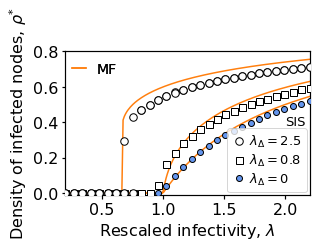

In [10]:
fig = plt.figure(figsize=(4.5,3));
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2

markers = ['o','o','s','o']
zorders = [8,7,6,5]
mfcs = ['white', 'white', 'white', 'cornflowerblue']
lables = [r'$\lambda_\Delta=2.5$','',r'$\lambda_\Delta=0.8$', r'$\lambda_\Delta=0$']
markersizes = [7.5,7.5,7,6]

ax = plt.subplot(111)

for i, (lambdaD_target, I_percentage) in enumerate(zip(lambdaD_target_list, I_percentage_list)):
    filename = 'result_RSC_'+'N'+str(N)+'_k'+str(k1)+'_kD'+str(k2)+'_mu'+str(mu)+'_lD'+str(lambdaD_target)+'_seed'+str(I_percentage)+'.p'
    results = pickle.load(open(out_dir+filename, "rb" ))
    avg_rhos, avg_k, avg_kD = parse_results(results, cut=cut)
    
    ax.plot(lambda1s, avg_rhos, markers[i], color='black', zorder=zorders[i],
            mfc=mfcs[i], markersize=markersizes[i], label=lables[i])

    if i != 1:
        ax.plot(MF_x, MF_y_dict[i], '-', markersize=2, color=u'#ff7f0e')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel(r'Rescaled infectivity, $\lambda$', size=16)
ax.set_ylabel(r'Density of infected nodes, $\rho^{*}$', size=16)
ax.set_xlim(0.2,2.2)
ax.set_ylim(-0.01,0.8);
ax.set_yticks([0,0.2,0.4,0.6,0.8]);

lgd = ax.legend(fontsize=13, handlelength=1, handletextpad=0.3, borderaxespad=0.2,
                loc='lower right', labelspacing=0.2, borderpad=0.4)  
ax.add_artist(lgd)

h = plt.plot([],[],'-', color=u'#ff7f0e', markersize=2, label='MF')
lgd = plt.legend(handles=h, loc=(0.02,0.82), frameon=False, fontsize=14, handlelength=1, borderpad=0.1)
ax.add_artist(lgd)

ax.annotate('SIS', (2,0.38), fontsize=13)

plt.tight_layout()
